In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import os, sys
# to avoid any possible jupyter crashes due to rpy2 not finding the R install on conda
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"
import scanpy as sc
import scFates as scf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.


### 1) Load the object

In [2]:
adata = sc.read('../fetal_lung_tip.h5ad')
sc.set_figure_params()

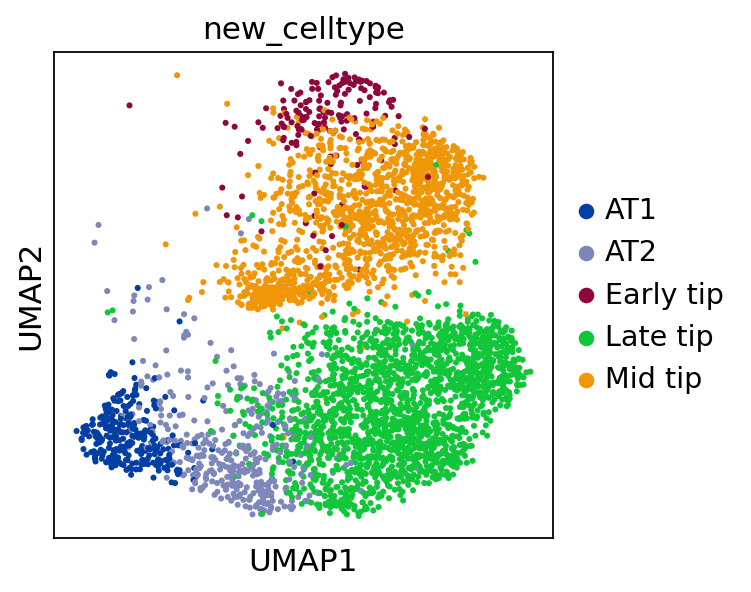

In [3]:
sc.pl.umap(adata, color='new_celltype')

### 2) Preprocess the object

In [4]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata,base=10)
sc.pp.highly_variable_genes(adata)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [5]:
adata

AnnData object with n_obs × n_vars = 4011 × 4980
    obs: 'batch', 'stage', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'donor', 'gender', 'new_celltype-code', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'broad_celltype', 'cycling', 'study', 'stage_coarse'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'big_cluster_colors', 'broad_celltype_colors', 'chemistry_colors', 'neighbors', 'new_celltype_colors', 'phase_colors', 'rank_genes_groups', 'rank_genes_groups_global', 'umap', 'log1p', 'hvg'
    obsm: 'X_FinVAE_30_0_nocg_nocc', 'X_pca', 'X_umap', 'X_umap_original'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
sc.pp.scale(adata)
sc.pp.pca(adata)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:00)


In [7]:
sc.tl.leiden(adata, resolution=2)

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)


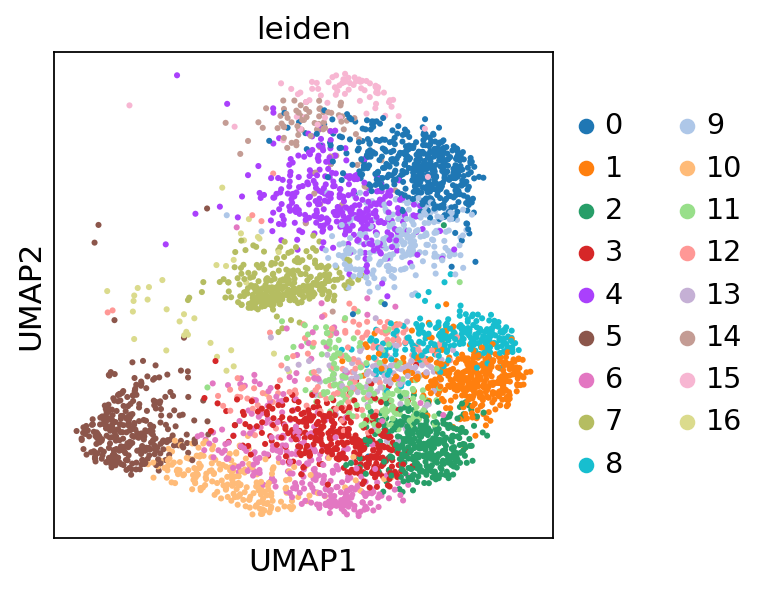

In [8]:
sc.pl.umap(adata, color='leiden')

### 3) Find and remove the clusters that can negatively affect scFates outputs

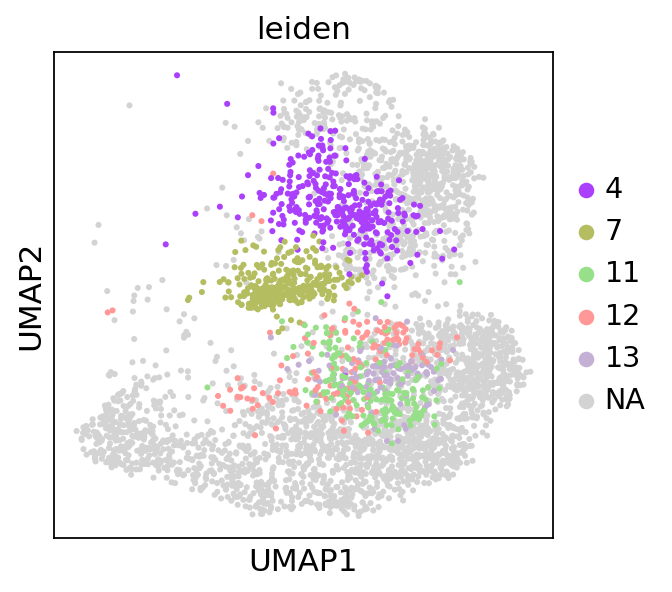

In [9]:
sc.pl.umap(adata, color='leiden', groups=['4','7','11','12','13'])

In [10]:
adata[adata.obs.leiden.isin(['4','7','11','12','13'])]

View of AnnData object with n_obs × n_vars = 1047 × 4980
    obs: 'batch', 'stage', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'donor', 'gender', 'new_celltype-code', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'broad_celltype', 'cycling', 'study', 'stage_coarse'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'big_cluster_colors', 'broad_celltype_colors', 'chemistry_colors', 'neighbors', 'new_celltype_colors', 'phase_colors', 'rank_genes_groups', 'rank_genes_groups_global', 'umap', 'log1p', 'hvg', 'pca', 'leiden', 'leiden_colors'
    obsm: 'X_FinVAE_30_0_nocg_nocc', 'X_pca', 'X_umap', 'X_umap_original'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
adata = adata[~adata.obs.leiden.isin(['4','6','7','11','12','13'])]


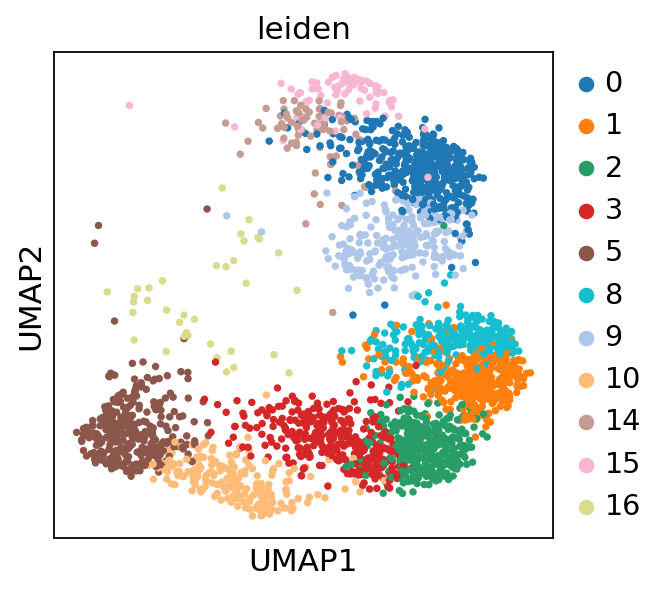

In [12]:
sc.pl.umap(adata, color='leiden')

### 4) Run scFates workflow

In [13]:
scf.tl.curve(adata,Nodes=30,use_rep="X_umap",ndims_rep=2,)

inferring a principal curve --> parameters used 
    30 principal points, mu = 0.1, lambda = 0.01
    finished (0:00:01) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


In [14]:
adata

AnnData object with n_obs × n_vars = 2658 × 4980
    obs: 'batch', 'stage', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'donor', 'gender', 'new_celltype-code', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'broad_celltype', 'cycling', 'study', 'stage_coarse'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'big_cluster_colors', 'broad_celltype_colors', 'chemistry_colors', 'neighbors', 'new_celltype_colors', 'phase_colors', 'rank_genes_groups', 'rank_genes_groups_global', 'umap', 'log1p', 'hvg', 'pca', 'leiden', 'leiden_colors', 'graph', 'epg'
    obsm: 'X_FinVAE_30_0_nocg_nocc', 'X_pca', 'X_umap', 'X_umap_original', 'X_R'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

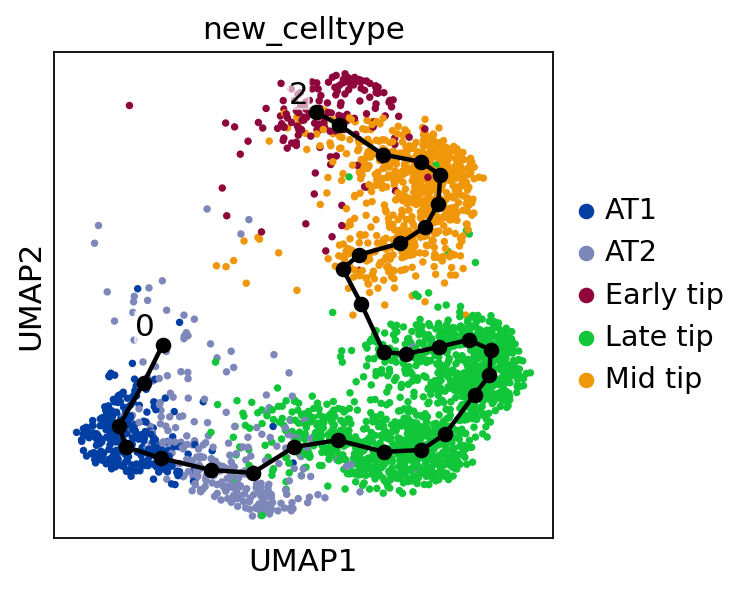

In [15]:
scf.pl.graph(adata,basis="umap",color_cells='new_celltype')

In [16]:
scf.tl.root(adata, 2)

node 2 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [17]:
scf.tl.pseudotime(adata,n_jobs=8,n_map=100,seed=42)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [02:19<00:00,  1.40s/it]
    finished (0:02:20) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


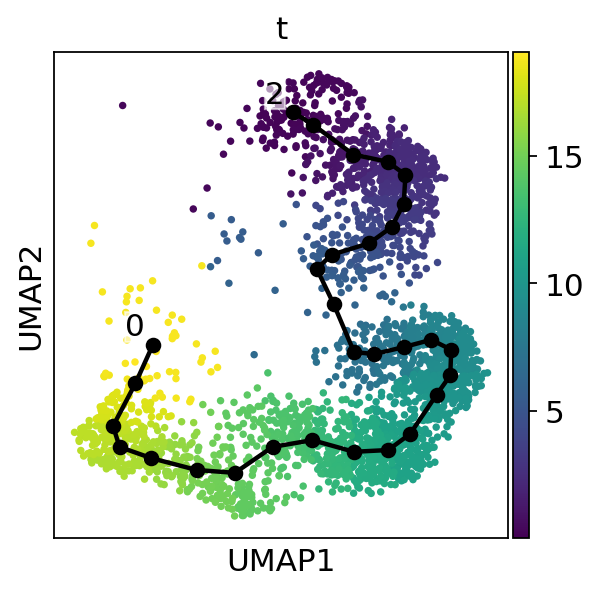

In [18]:
scf.pl.graph(adata,basis="umap",color_cells='t')

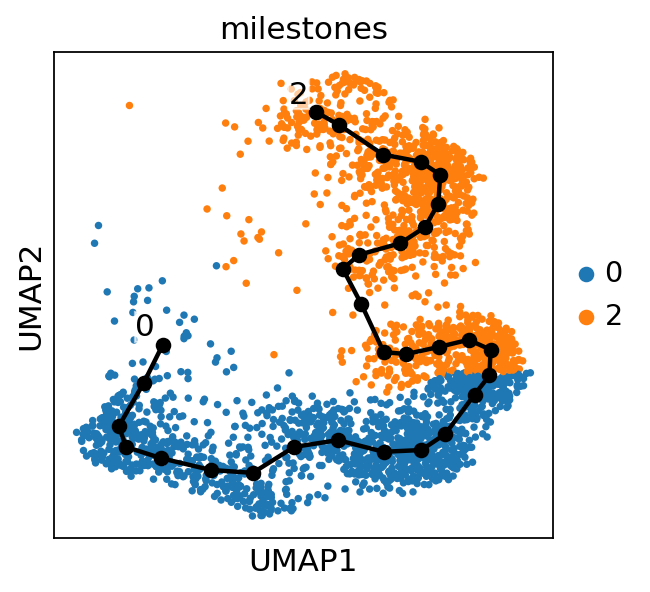

In [19]:
scf.pl.graph(adata,basis="umap",color_cells='milestones')

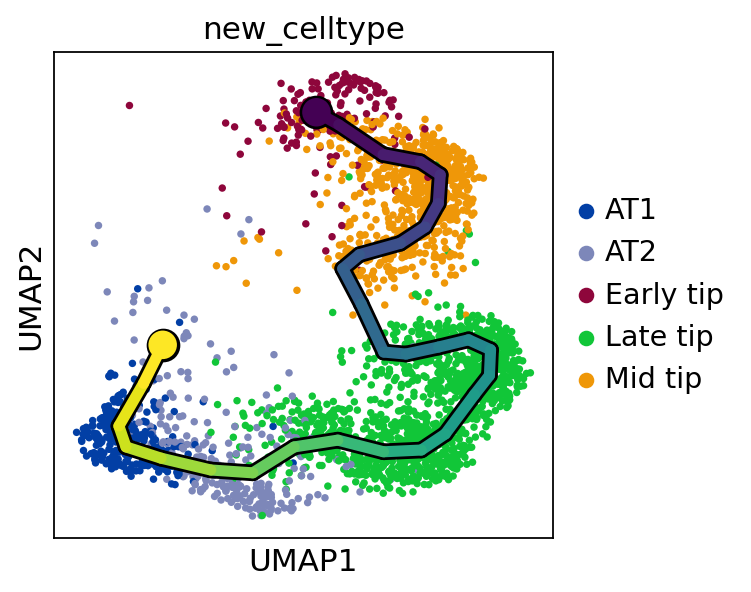

In [20]:
scf.pl.trajectory(adata, color_cells = 'new_celltype')

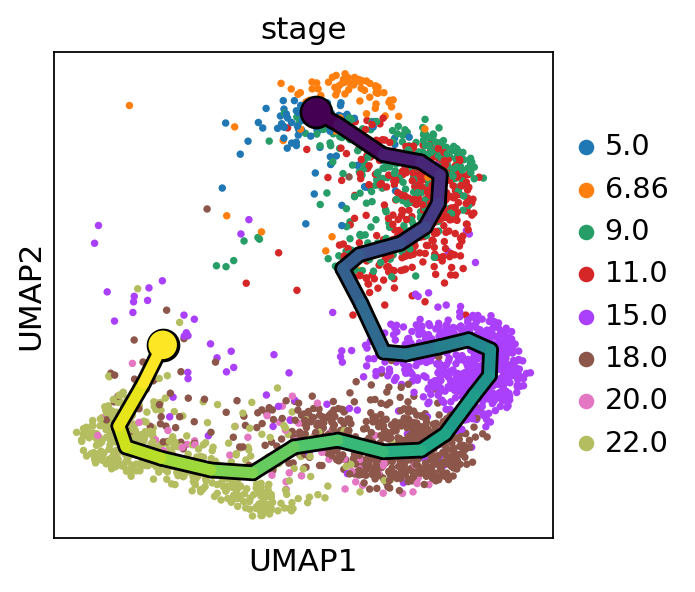

In [21]:
scf.pl.trajectory(adata, color_cells = 'stage')

In [22]:
scf.tl.test_association(adata,n_jobs=8)

test features for association with the trajectory
    single mapping : 100%|██████████| 4980/4980 [09:53<00:00,  8.38it/s]
    found 387 significant features (0:09:53) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [23]:
adata.var['signi'].sum()

387

In [24]:
scf.tl.fit(adata,n_jobs=20)


fit features associated with the trajectory
    single mapping : 100%|██████████| 387/387 [01:52<00:00,  3.43it/s]
    finished (adata subsetted to keep only fitted features!) (0:01:53) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [25]:
scf.tl.cluster(adata,n_neighbors=100,metric="correlation")

Clustering features using fitted layer
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
    finished (0:00:05) --> added 
    .var['clusters'] identified modules.


### 5) Add one of the marker genes that was not included in the object used in the analysis

In [3]:
data_dir = '/lustre/scratch126/cellgen/team292/ha10/data/Fetal_Lung/'
adata_orig = sc.read(data_dir+'Assembled10DomainsFiltered.h5ad')

In [4]:
adata_orig

AnnData object with n_obs × n_vars = 71752 × 26568
    obs: 'batch', 'stage', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'donor', 'gender', 'new_celltype-code', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'broad_celltype'
    var: 'gene_ids', 'n_cells', 'highly_variable5891STDY8062349', 'highly_variable5891STDY8062350', 'highly_variable5891STDY8062351', 'highly_variable5891STDY8062352', 'highly_variable5891STDY8062353', 'highly_variable5891STDY8062354', 'highly_variable5891STDY8062355', 'highly_variable5891STDY8062356', 'highly_variableWSSS8012016', 'highly_variableWSSS8011222', 'highly_variableWSSS_F_LNG8713176', 'highly_variableWSSS_F_LNG8713177', 'highly_variableWSSS_F_LNG8713178', 'highly_variableWSSS_F_LNG8713179', 'highly_variableWSSS_F_LNG8713180', 'highly_variableWSSS_F_LNG8713181', 'highly_variableWSSS

In [7]:
genes = list(adata.var_names)

In [8]:
genes.append('EEF1G')

In [9]:
genes[-1]

'EEF1G'

In [10]:
adata_orig = adata_orig[ad2.obs_names,genes]

In [11]:
adata = adata_orig.copy()

In [12]:
adata.uns = ad2.uns
adata.obsm = ad2.obsm

### 6) Repeat the analysis on the original object using the tip cells and the genes found in the association test

In [13]:
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout

In [14]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata,base=10)
sc.pp.highly_variable_genes(adata)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [15]:
sc.pp.scale(adata)
sc.pp.pca(adata)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:00)


In [16]:
adata

AnnData object with n_obs × n_vars = 2658 × 388
    obs: 'batch', 'stage', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'donor', 'gender', 'new_celltype-code', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'broad_celltype'
    var: 'gene_ids', 'n_cells', 'highly_variable5891STDY8062349', 'highly_variable5891STDY8062350', 'highly_variable5891STDY8062351', 'highly_variable5891STDY8062352', 'highly_variable5891STDY8062353', 'highly_variable5891STDY8062354', 'highly_variable5891STDY8062355', 'highly_variable5891STDY8062356', 'highly_variableWSSS8012016', 'highly_variableWSSS8011222', 'highly_variableWSSS_F_LNG8713176', 'highly_variableWSSS_F_LNG8713177', 'highly_variableWSSS_F_LNG8713178', 'highly_variableWSSS_F_LNG8713179', 'highly_variableWSSS_F_LNG8713180', 'highly_variableWSSS_F_LNG8713181', 'highly_variableWSSS_F_

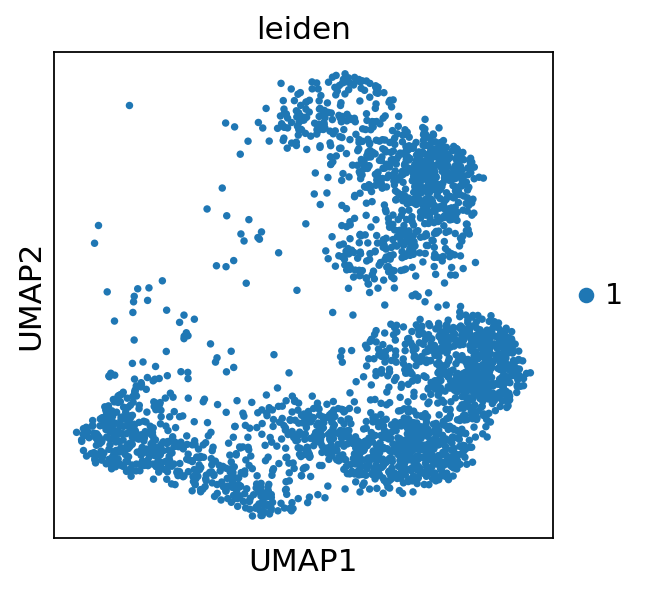

In [17]:
sc.pl.umap(adata, color='leiden')

In [18]:
scf.tl.curve(adata,Nodes=30,use_rep="X_umap",ndims_rep=2,)

inferring a principal curve --> parameters used 
    30 principal points, mu = 0.1, lambda = 0.01
    finished (0:00:13) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


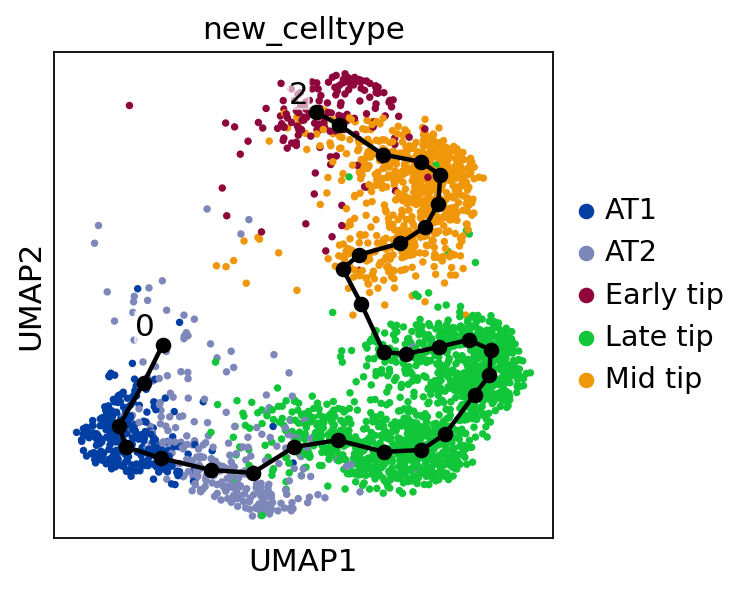

In [19]:
scf.pl.graph(adata,basis="umap",color_cells='new_celltype')

In [20]:
scf.tl.root(adata, 2)

node 2 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [21]:
scf.tl.pseudotime(adata,n_jobs=4,n_map=100,seed=42)

projecting cells onto the principal graph
    mappings:   0%|          | 0/100 [00:00<?, ?it/s]

Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.


    mappings:   9%|▉         | 9/100 [00:41<06:56,  4.58s/it]

Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.


    mappings: 100%|██████████| 100/100 [03:28<00:00,  2.09s/it]
    finished (0:03:29) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


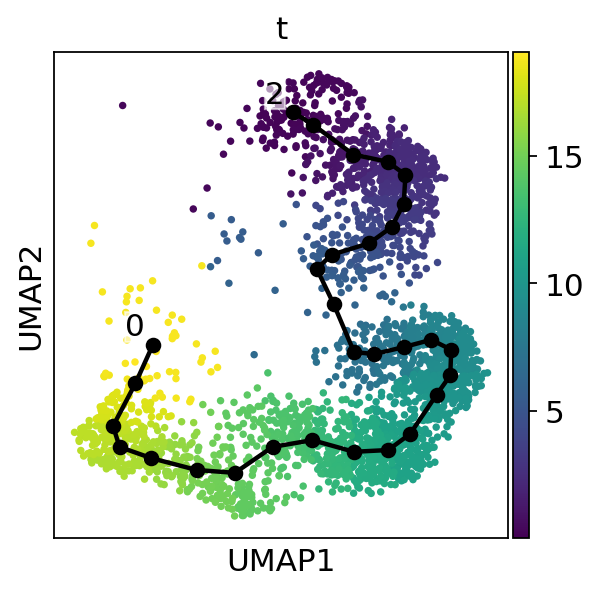

In [23]:
scf.pl.graph(adata,basis="umap",color_cells='t')

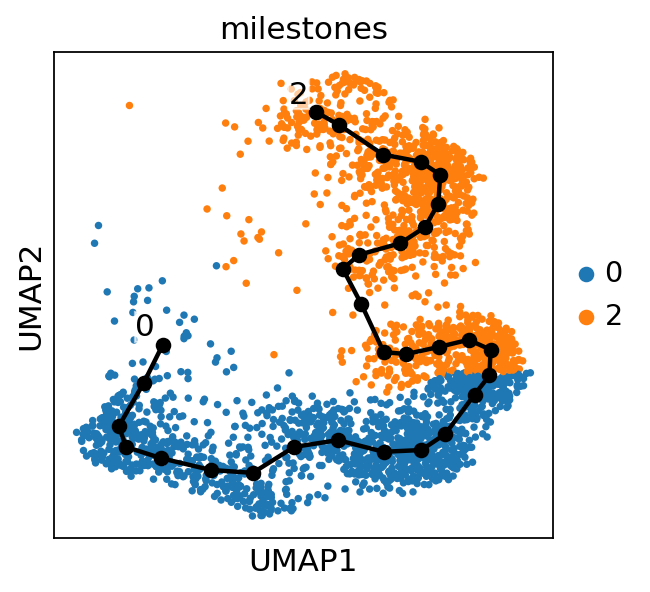

In [24]:
scf.pl.graph(adata,basis="umap",color_cells='milestones')

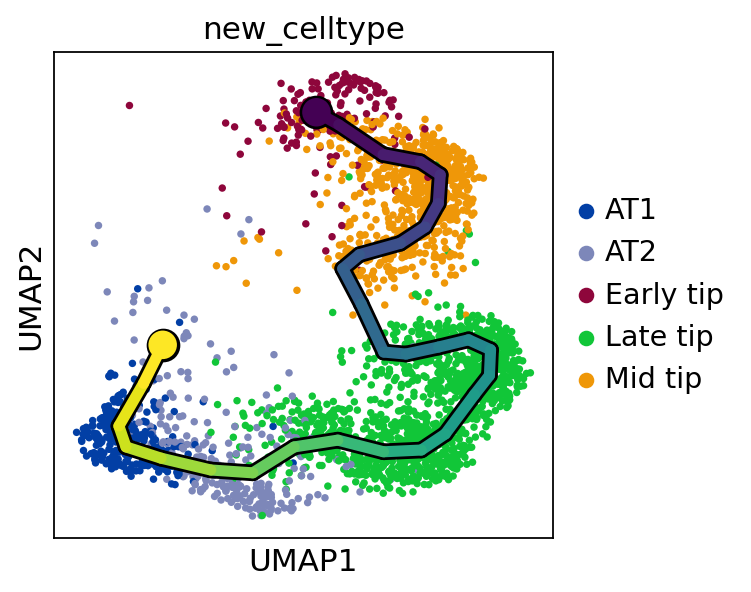

In [25]:
scf.pl.trajectory(adata, color_cells = 'new_celltype')

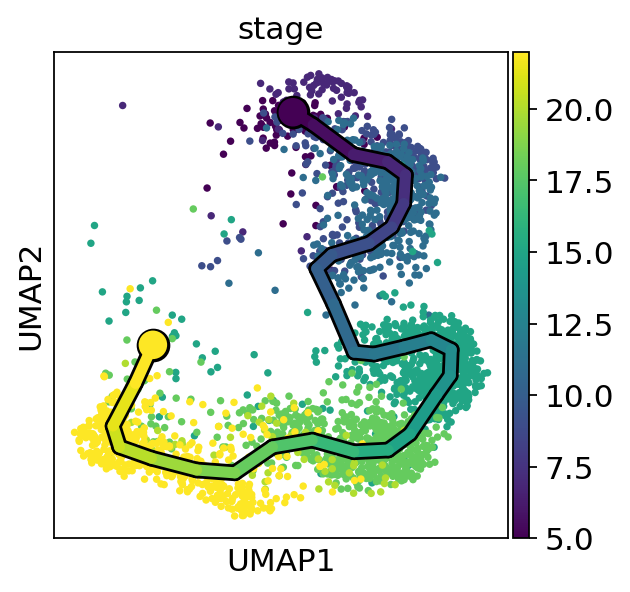

In [26]:
scf.pl.trajectory(adata, color_cells = 'stage')

In [22]:
scf.tl.test_association(adata,n_jobs=8)

test features for association with the trajectory
    single mapping :  12%|█▏        | 45/388 [00:17<02:16,  2.51it/s]

Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.


    single mapping : 100%|██████████| 388/388 [02:05<00:00,  3.09it/s]
    found 372 significant features (0:02:05) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [24]:
scf.tl.fit(adata,features=adata.var_names,n_jobs=20,)


fit features associated with the trajectory
    single mapping :  10%|▉         | 37/388 [00:33<05:14,  1.11it/s]

Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.
Unable to determine R library path: Command '('/so

    single mapping :  11%|█         | 41/388 [00:36<05:08,  1.12it/s]

Unable to determine R library path: Command '('/software/cellgen/team278/bc8/envs/scfates/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 255.


    single mapping : 100%|██████████| 388/388 [03:48<00:00,  1.70it/s]
    finished (adata subsetted to keep only fitted features!) (0:03:48) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [25]:
scf.tl.cluster(adata,n_neighbors=100,metric="correlation")

Clustering features using fitted layer
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
    finished (0:00:14) --> added 
    .var['clusters'] identified modules.


In [59]:
adata

AnnData object with n_obs × n_vars = 2658 × 388
    obs: 'batch', 'stage', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'donor', 'gender', 'new_celltype-code', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'broad_celltype', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'gene_ids', 'n_cells', 'highly_variable5891STDY8062349', 'highly_variable5891STDY8062350', 'highly_variable5891STDY8062351', 'highly_variable5891STDY8062352', 'highly_variable5891STDY8062353', 'highly_variable5891STDY8062354', 'highly_variable5891STDY8062355', 'highly_variable5891STDY8062356', 'highly_variableWSSS8012016', 'highly_variableWSSS8011222', 'highly_variableWSSS_F_LNG8713176', 'highly_variableWSSS_F_LNG8713177', 'highly_variableWSSS_F_LNG8713178', 'highly_variableWSSS_F_LNG8713179', 'highly_variableWSSS_F_LNG8713180', 'highly_variableW

In [60]:
del adata.uns['epg']
adata.write('tip_removedClusters_scf_eef1g.h5ad', compression='gzip')

In [32]:
adata2 = adata.raw.to_adata()

In [33]:
adata

AnnData object with n_obs × n_vars = 2658 × 388
    obs: 'batch', 'stage', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'donor', 'gender', 'new_celltype-code', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'broad_celltype', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'gene_ids', 'n_cells', 'highly_variable5891STDY8062349', 'highly_variable5891STDY8062350', 'highly_variable5891STDY8062351', 'highly_variable5891STDY8062352', 'highly_variable5891STDY8062353', 'highly_variable5891STDY8062354', 'highly_variable5891STDY8062355', 'highly_variable5891STDY8062356', 'highly_variableWSSS8012016', 'highly_variableWSSS8011222', 'highly_variableWSSS_F_LNG8713176', 'highly_variableWSSS_F_LNG8713177', 'highly_variableWSSS_F_LNG8713178', 'highly_variableWSSS_F_LNG8713179', 'highly_variableWSSS_F_LNG8713180', 'highly_variableW

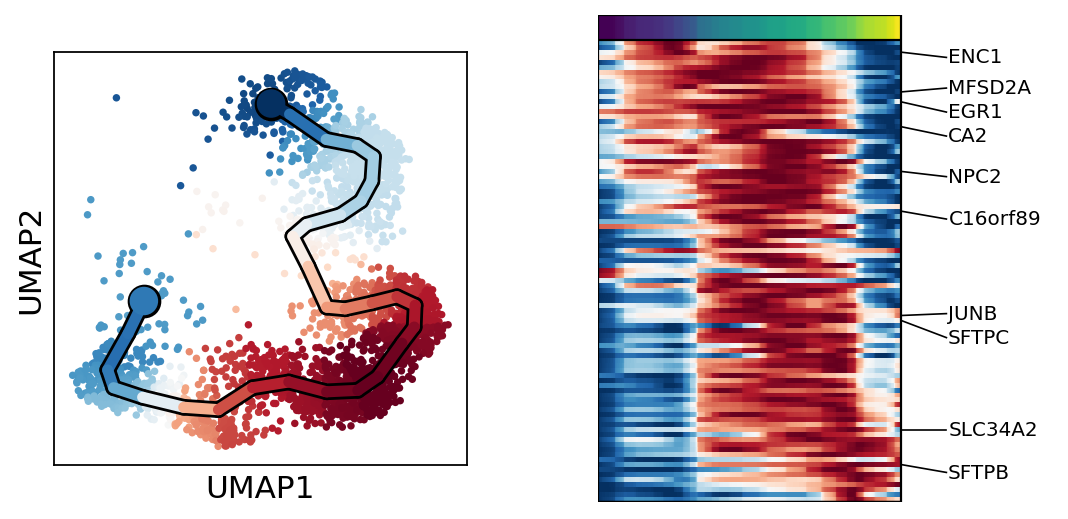

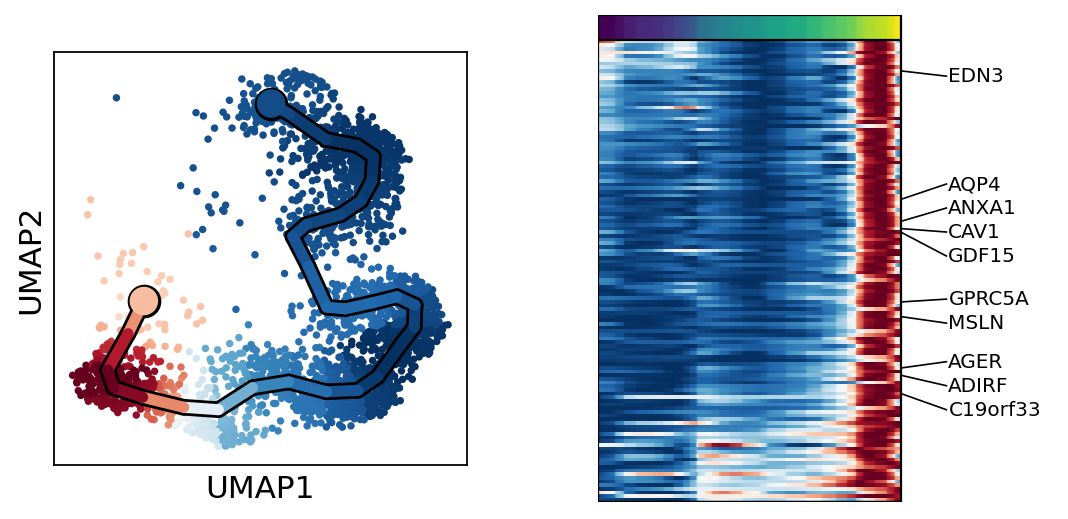

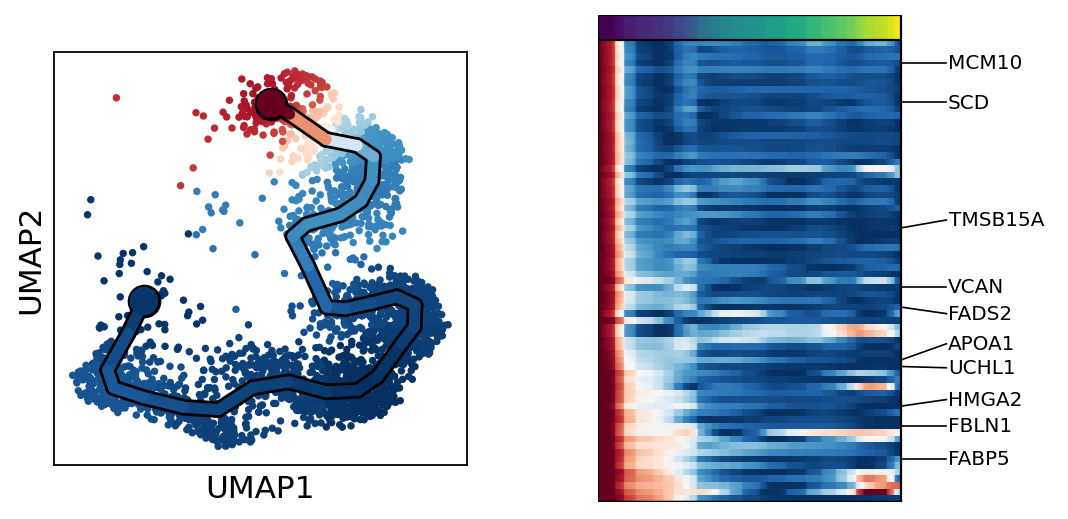

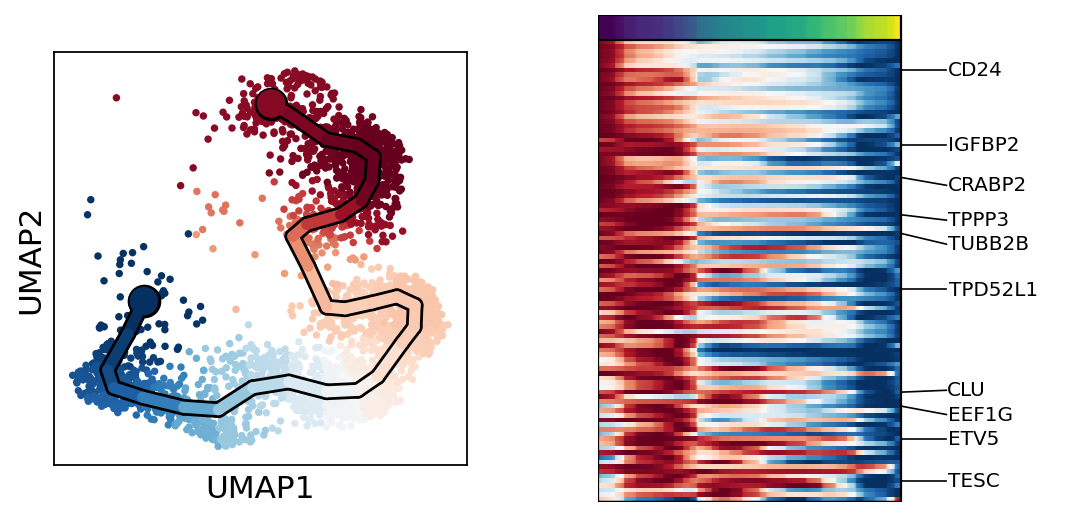

In [35]:
for c in adata.var["clusters"].unique():
    scf.pl.trends(adata,features=adata.var_names[adata.var.clusters==c],basis="umap")

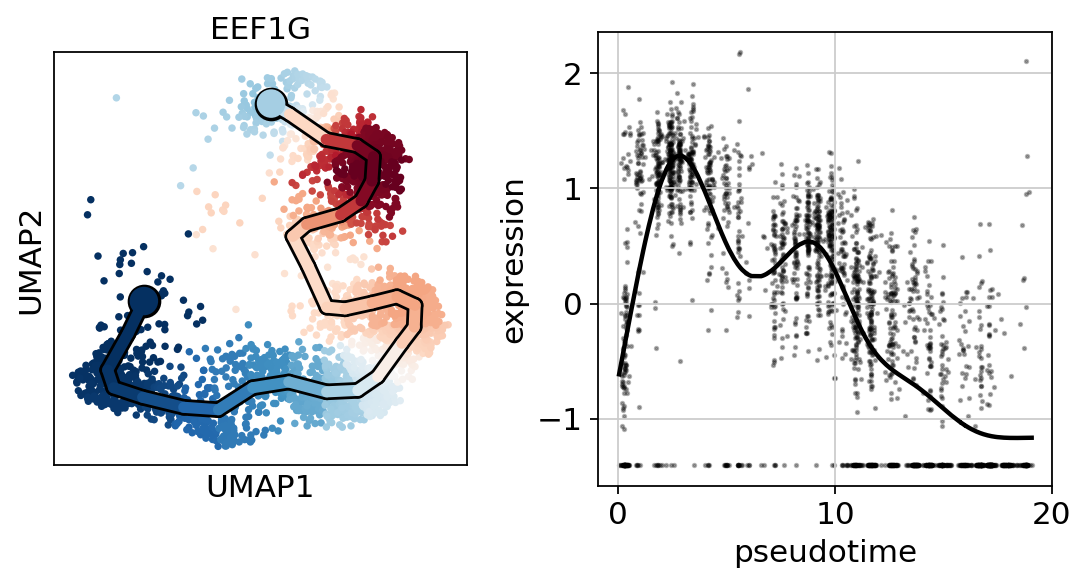

In [57]:
scf.pl.single_trend(adata,"EEF1G",color_exp="k")

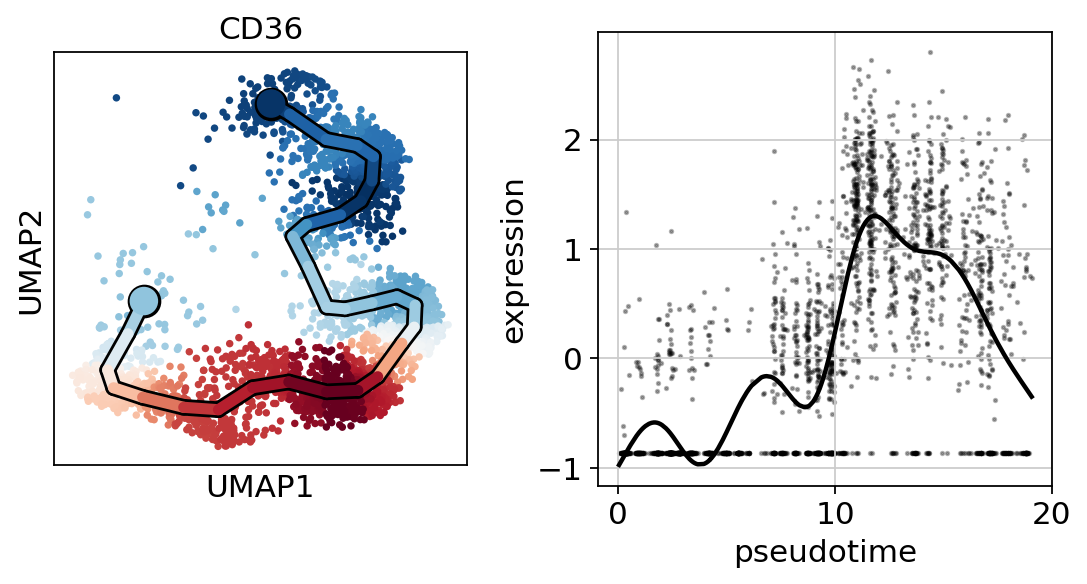

In [38]:
scf.pl.single_trend(adata,"CD36",basis="umap",color_exp="k")

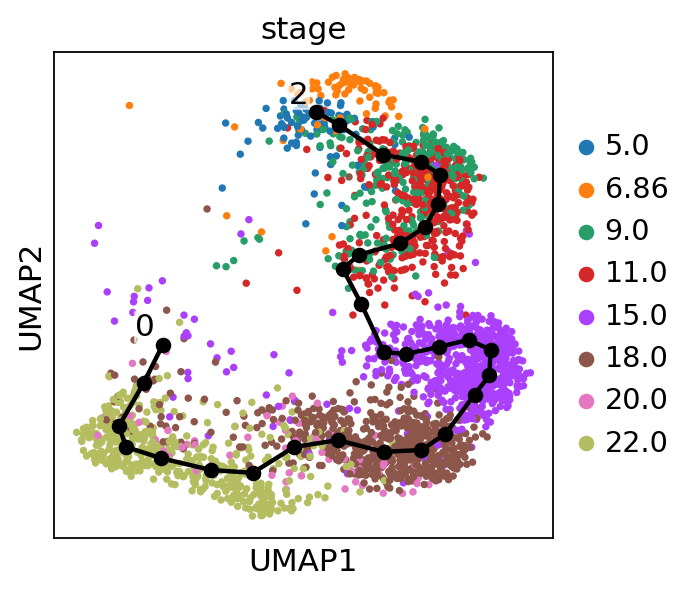

In [33]:
scf.pl.graph(adata,basis="umap",color_cells='stage')

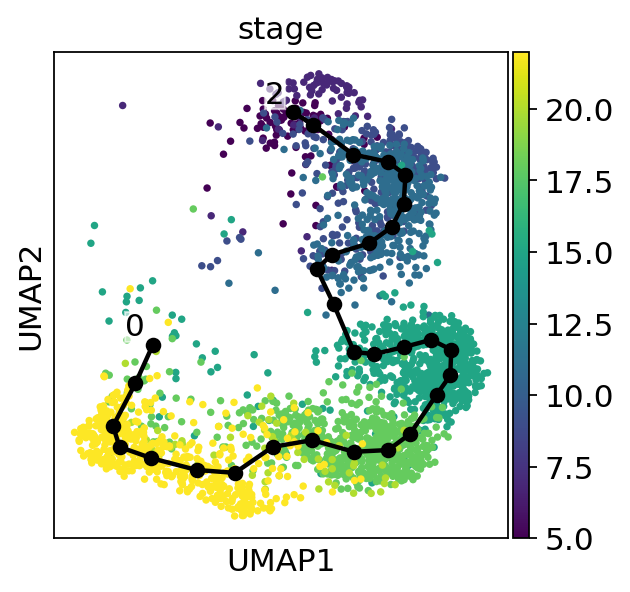

In [39]:
scf.pl.graph(adata,basis="umap",color_cells='stage')

### 7) Plot the change of the expression level with respect to the psuedotime

In [15]:
mpl.rcParams['pdf.fonttype'] = 42

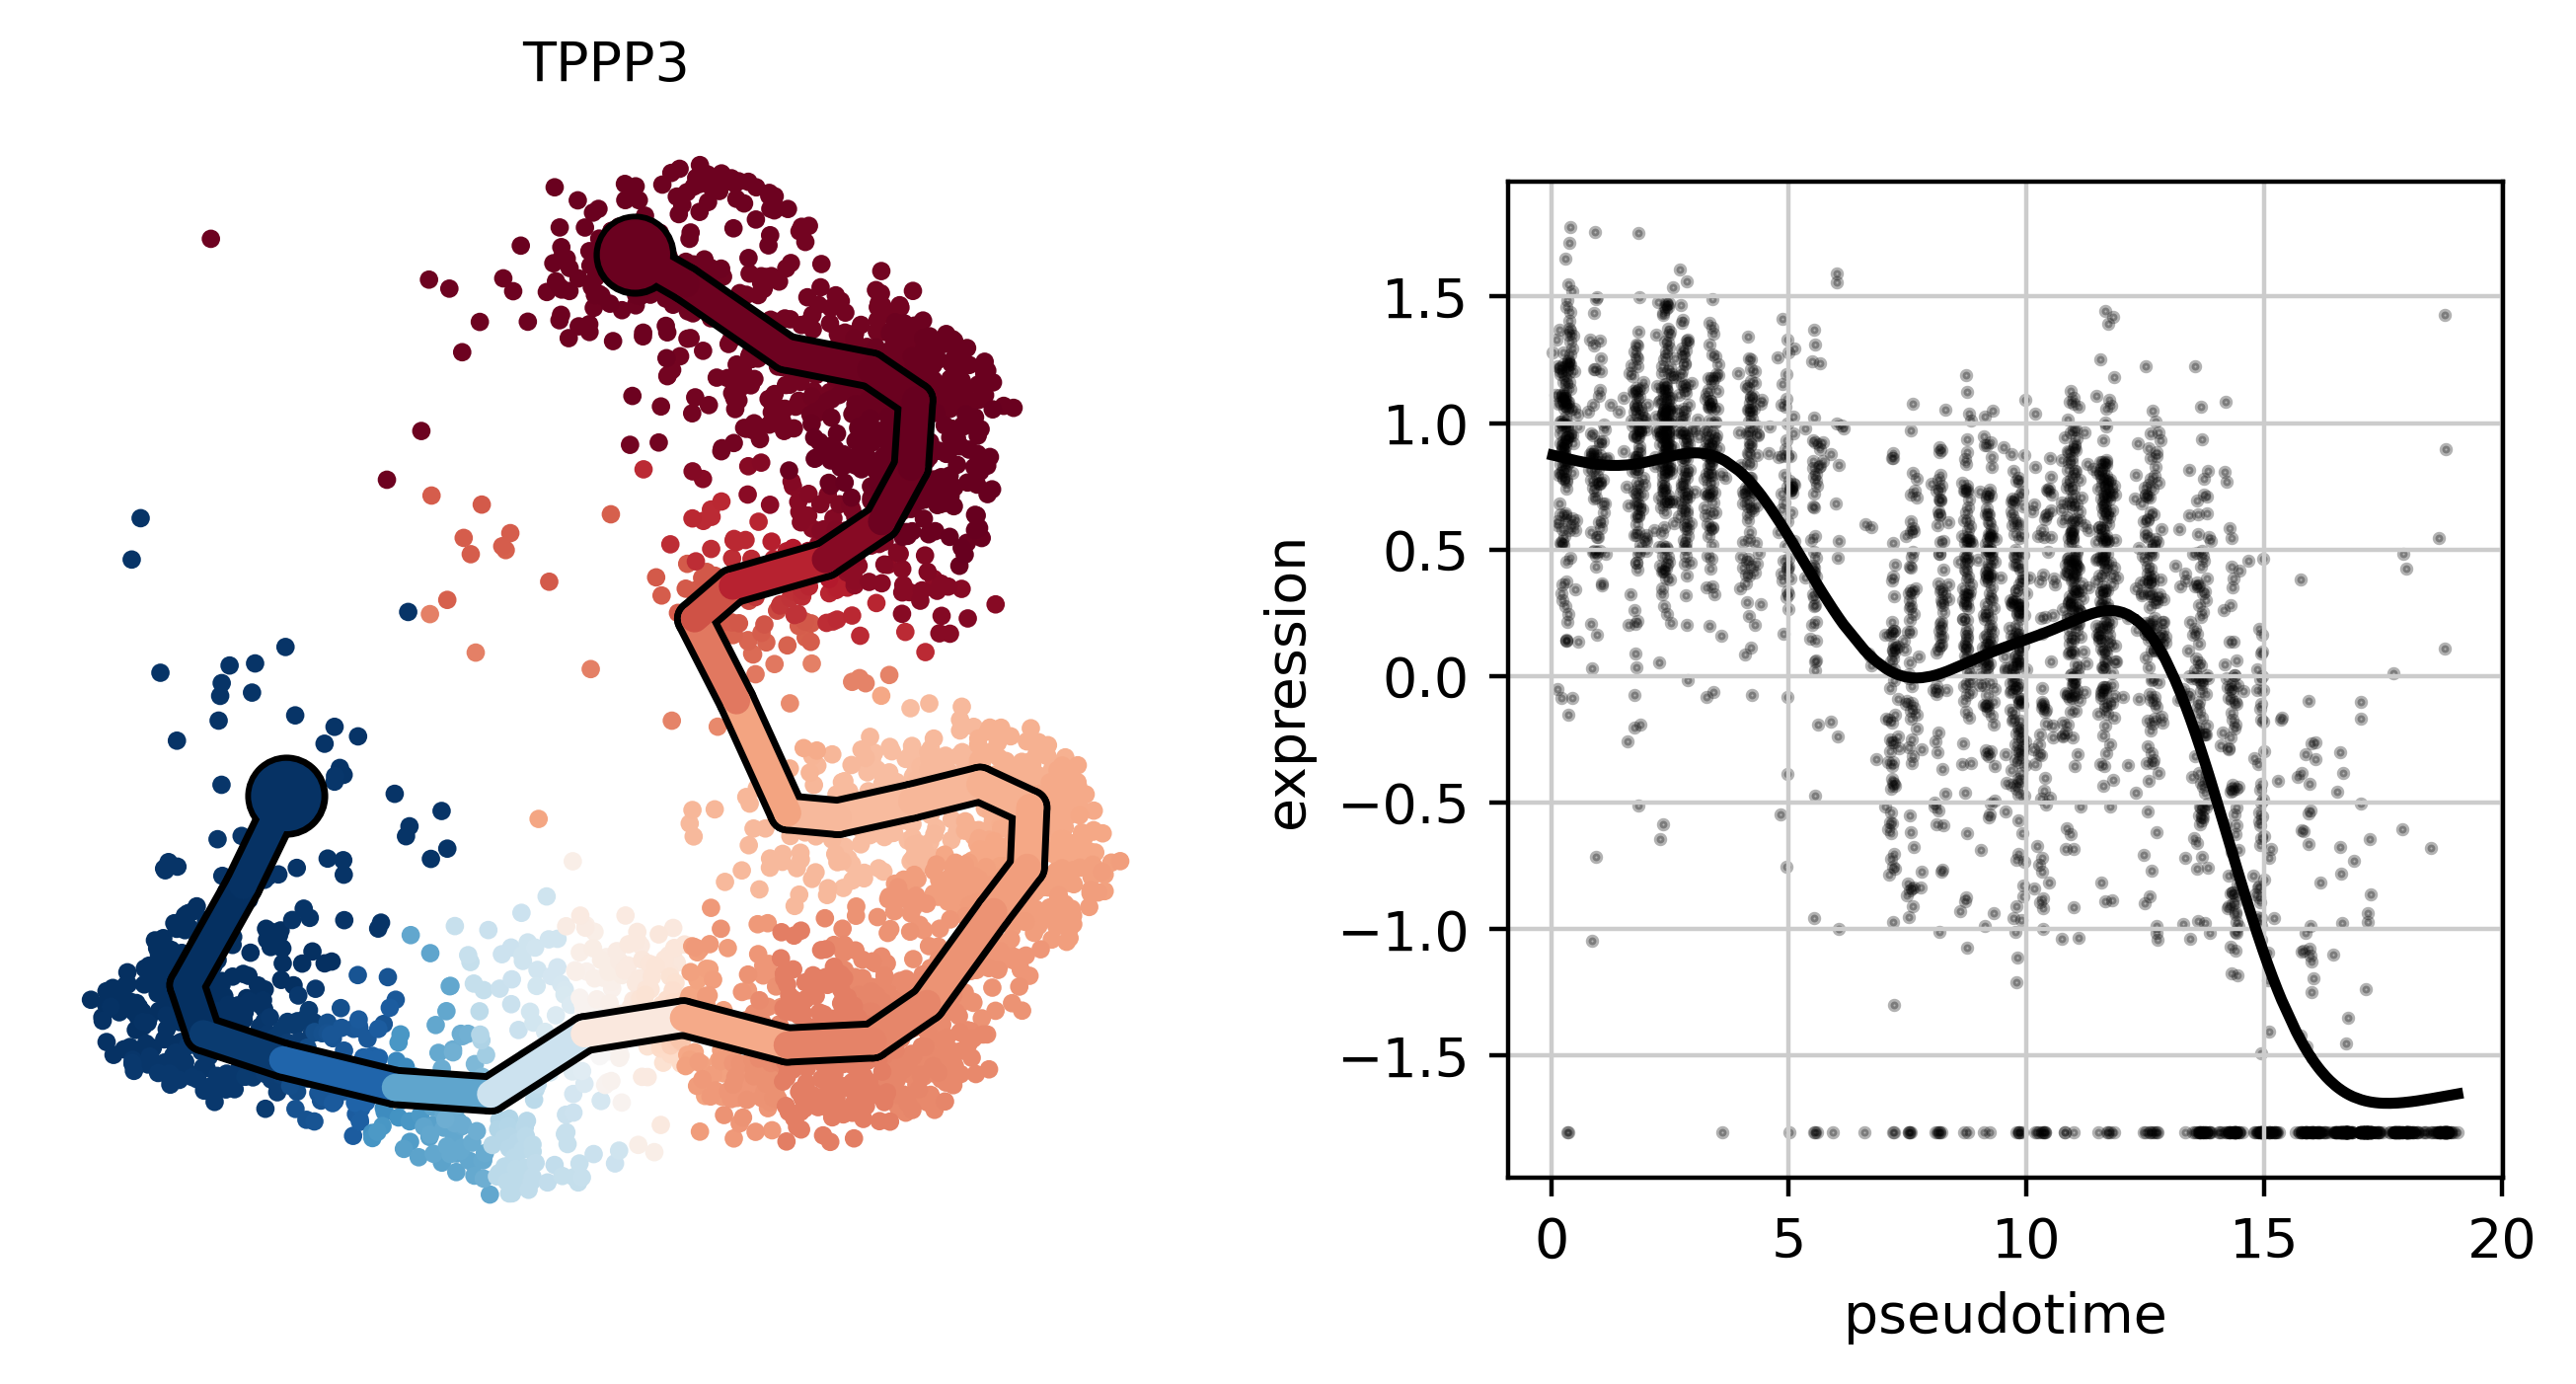

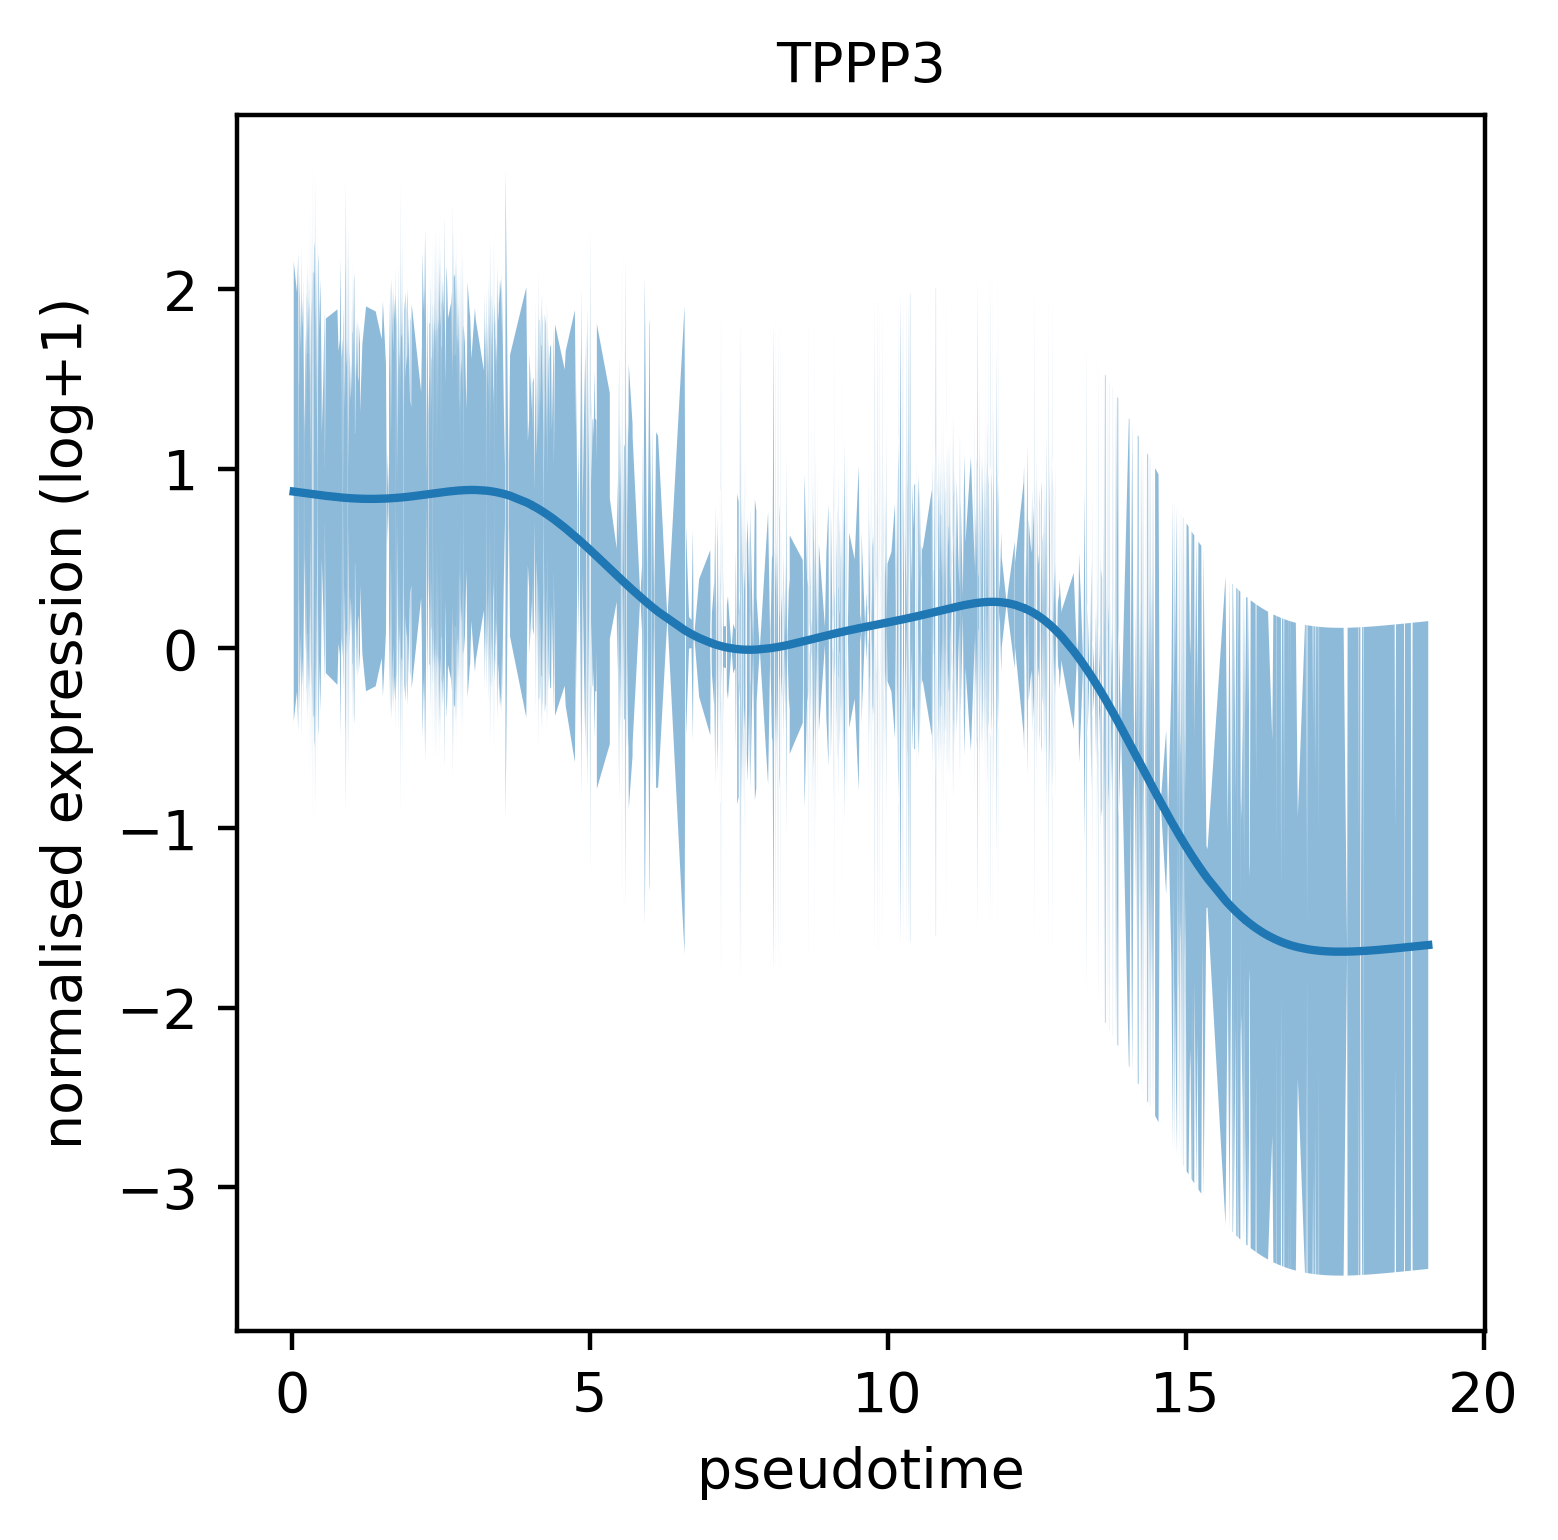

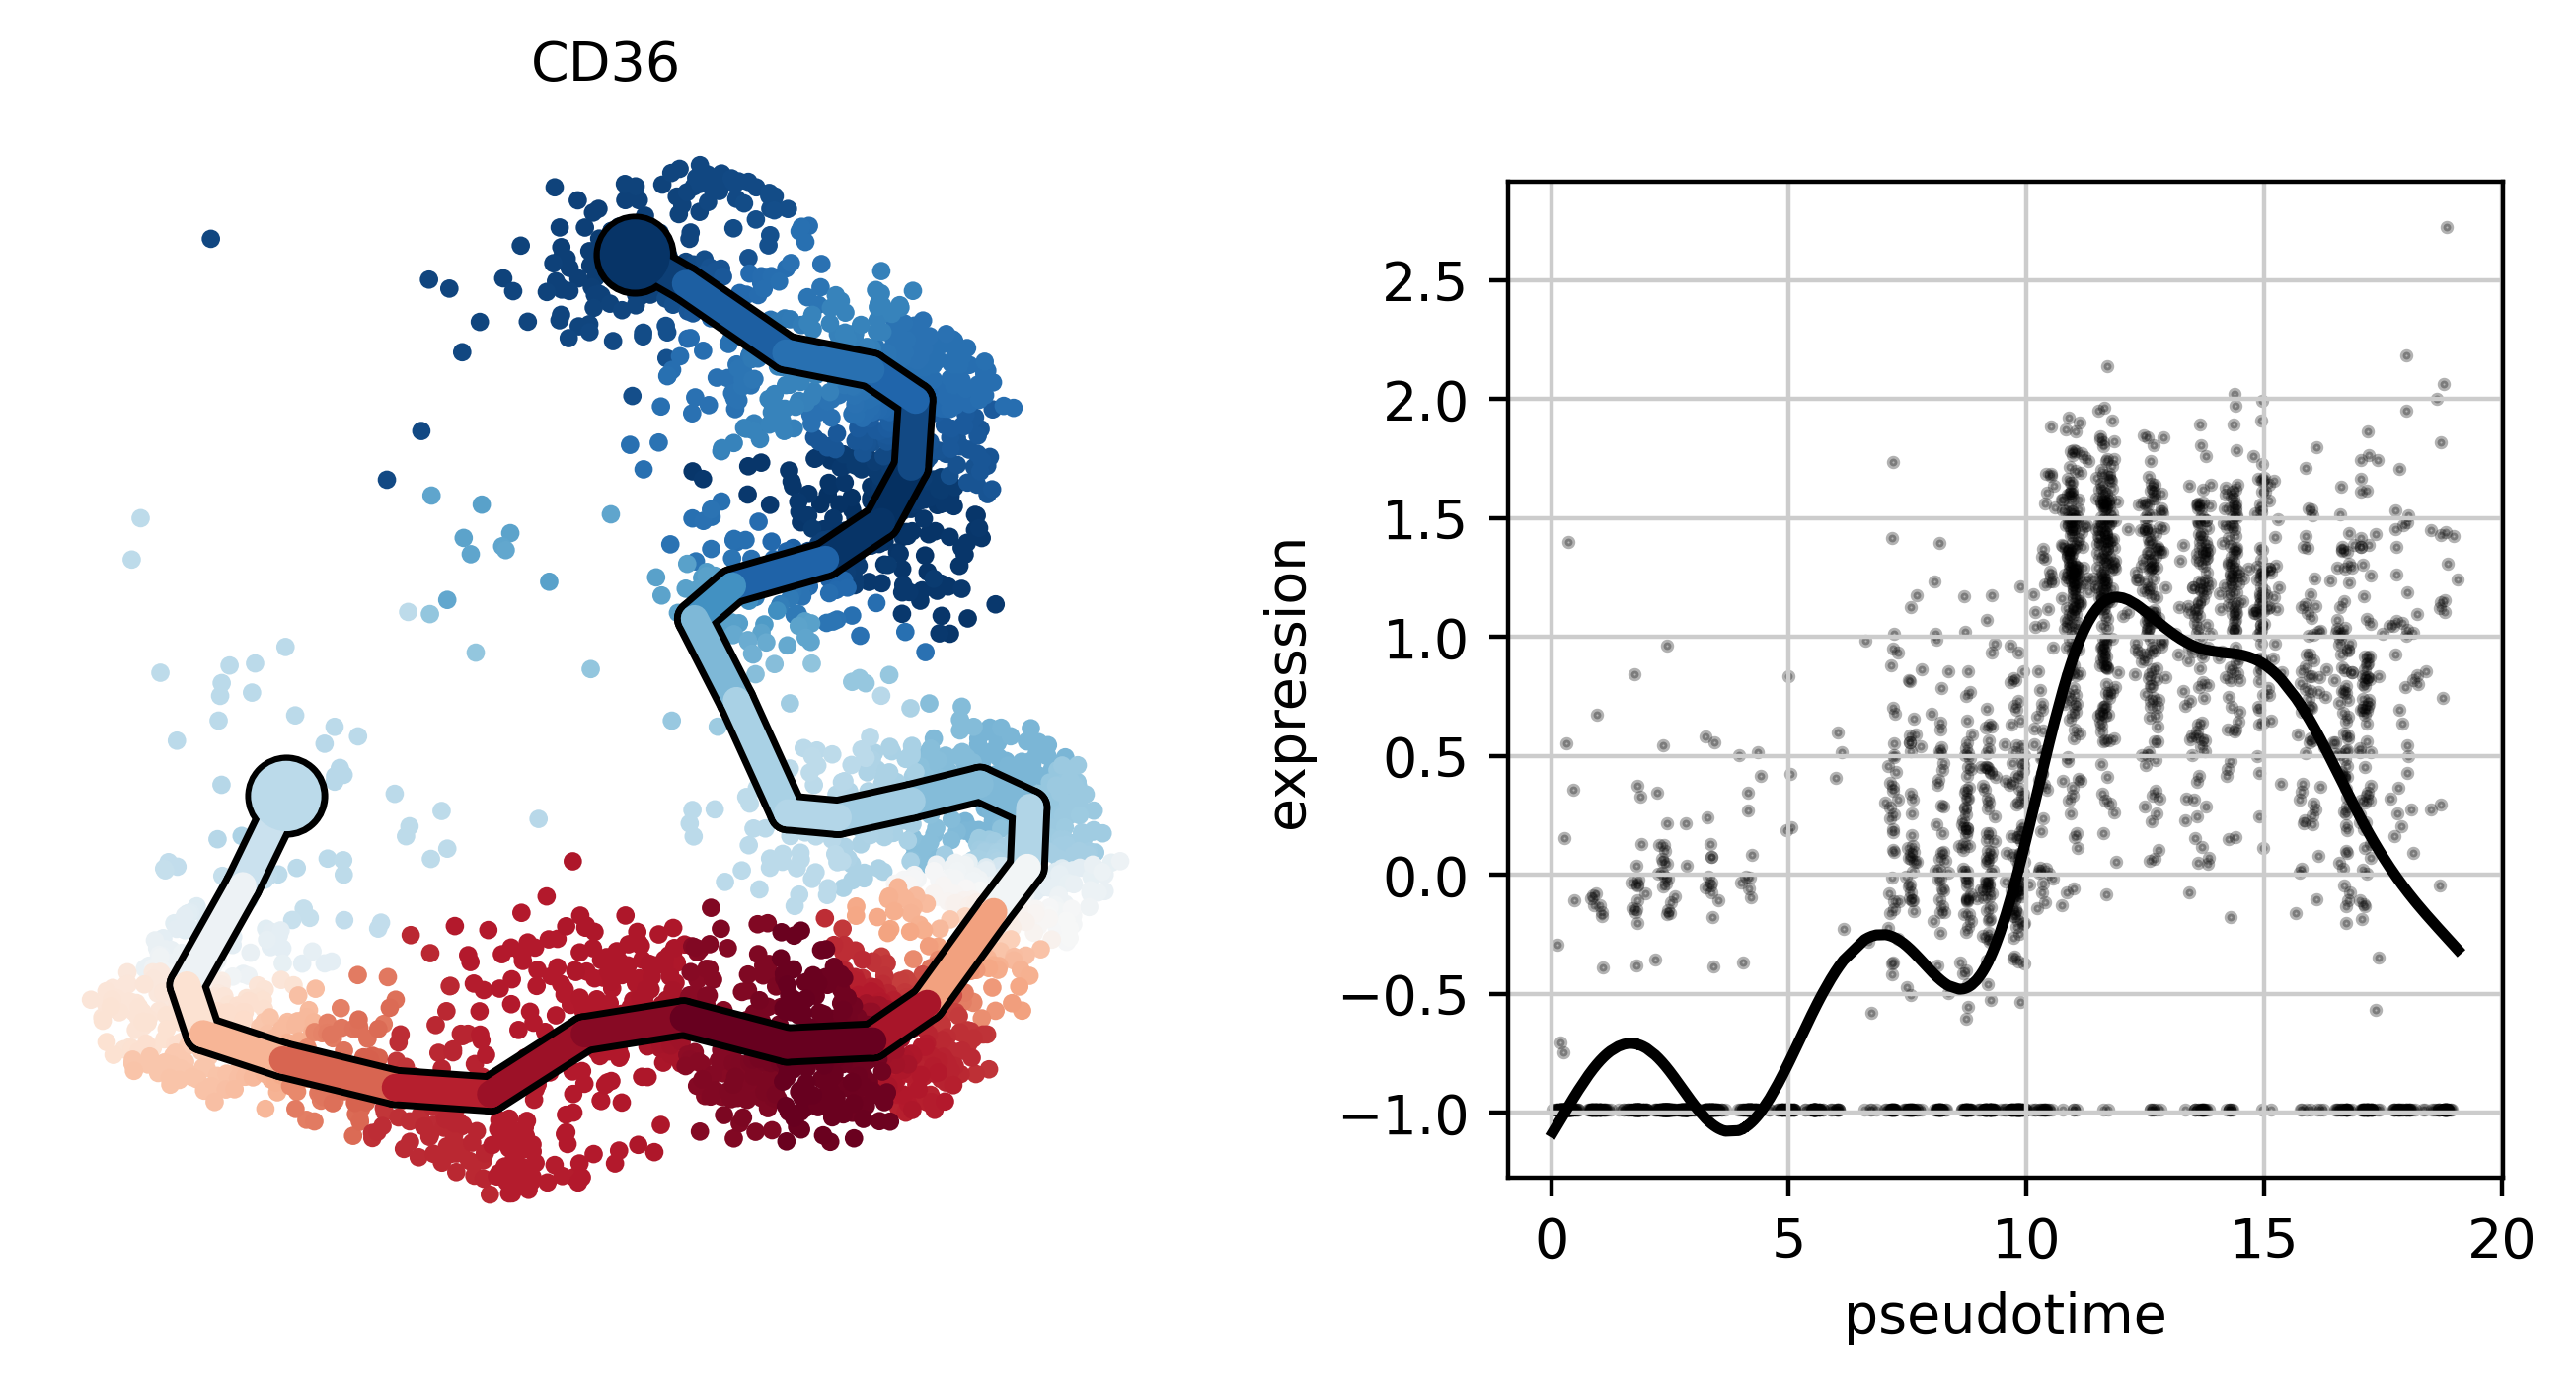

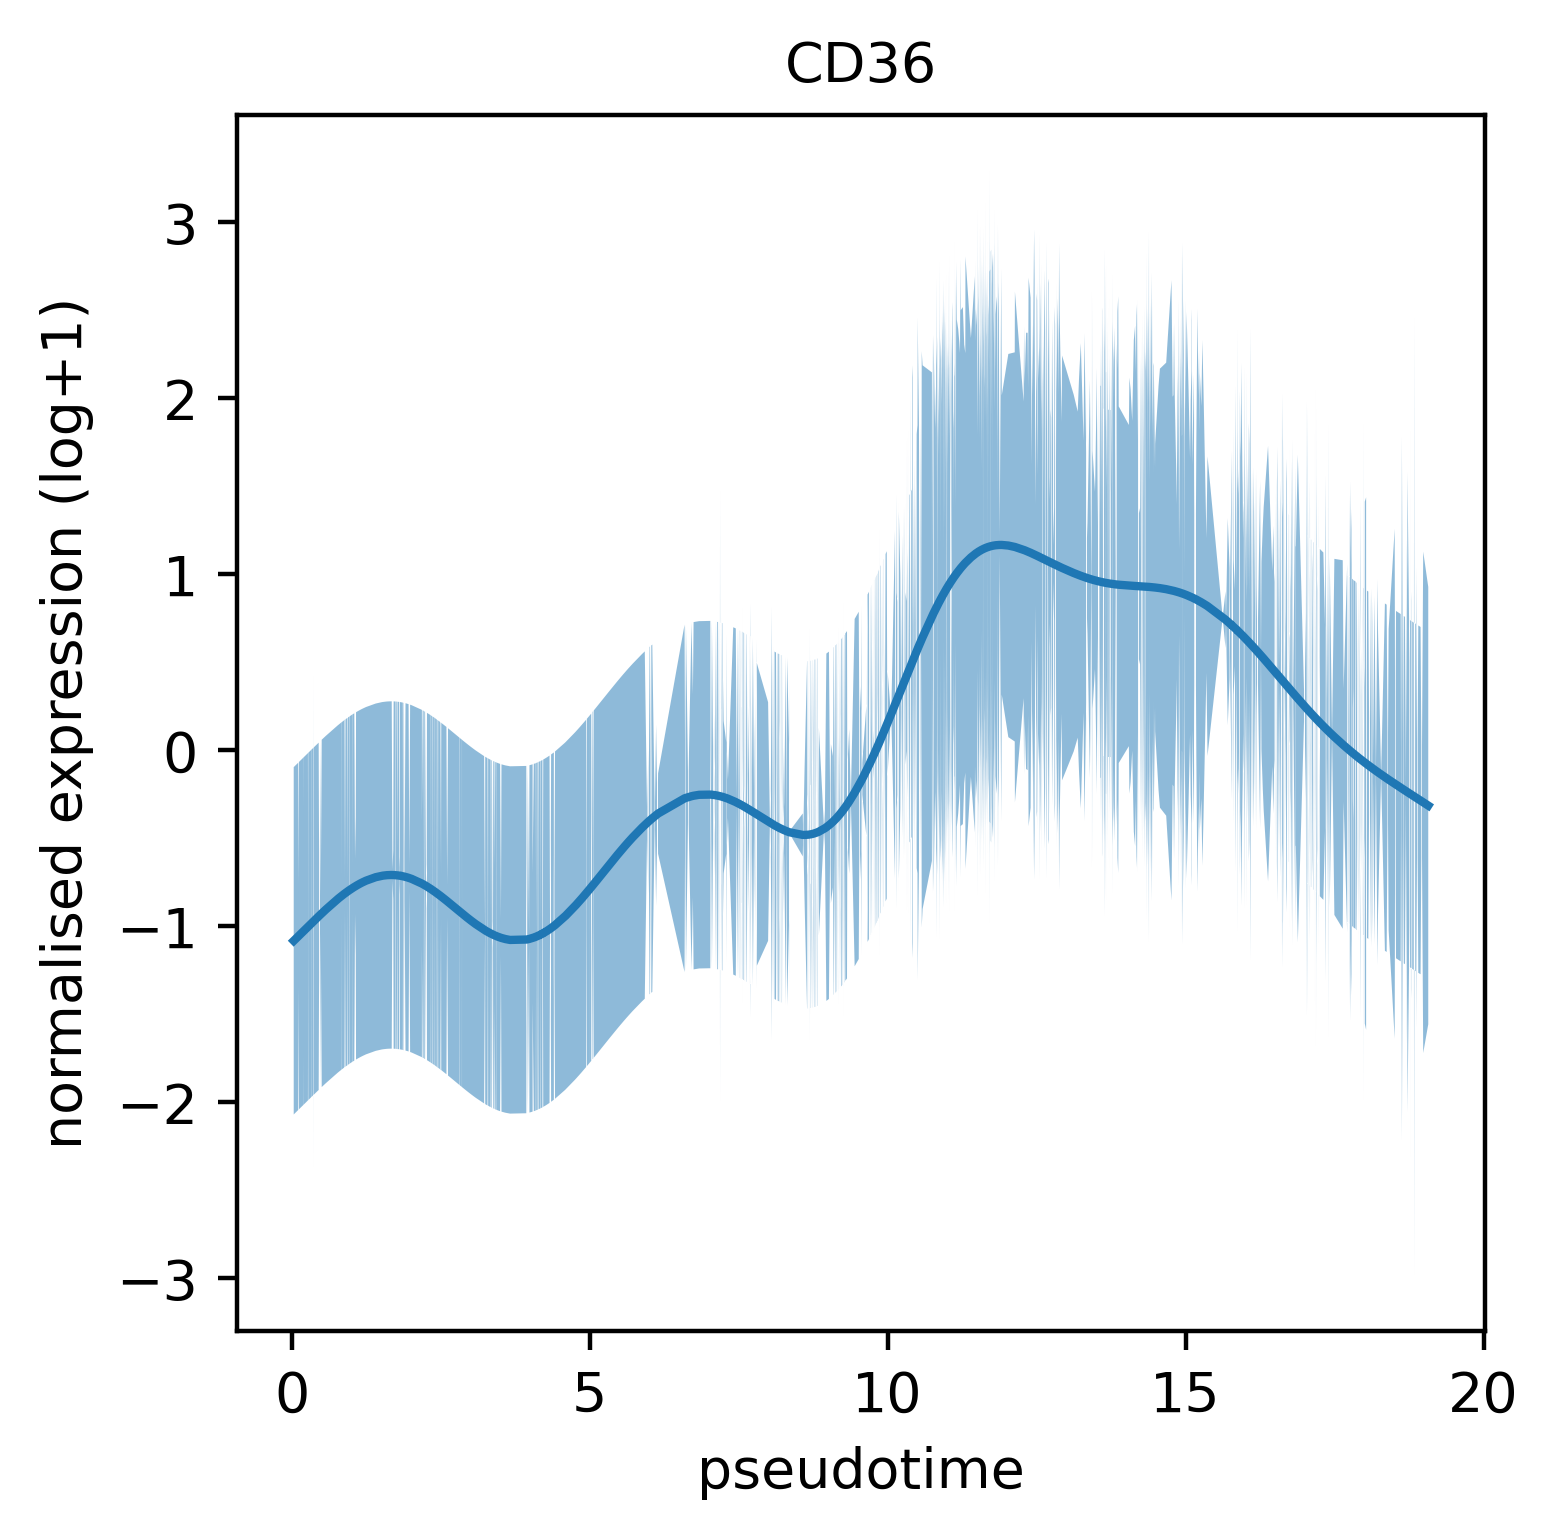

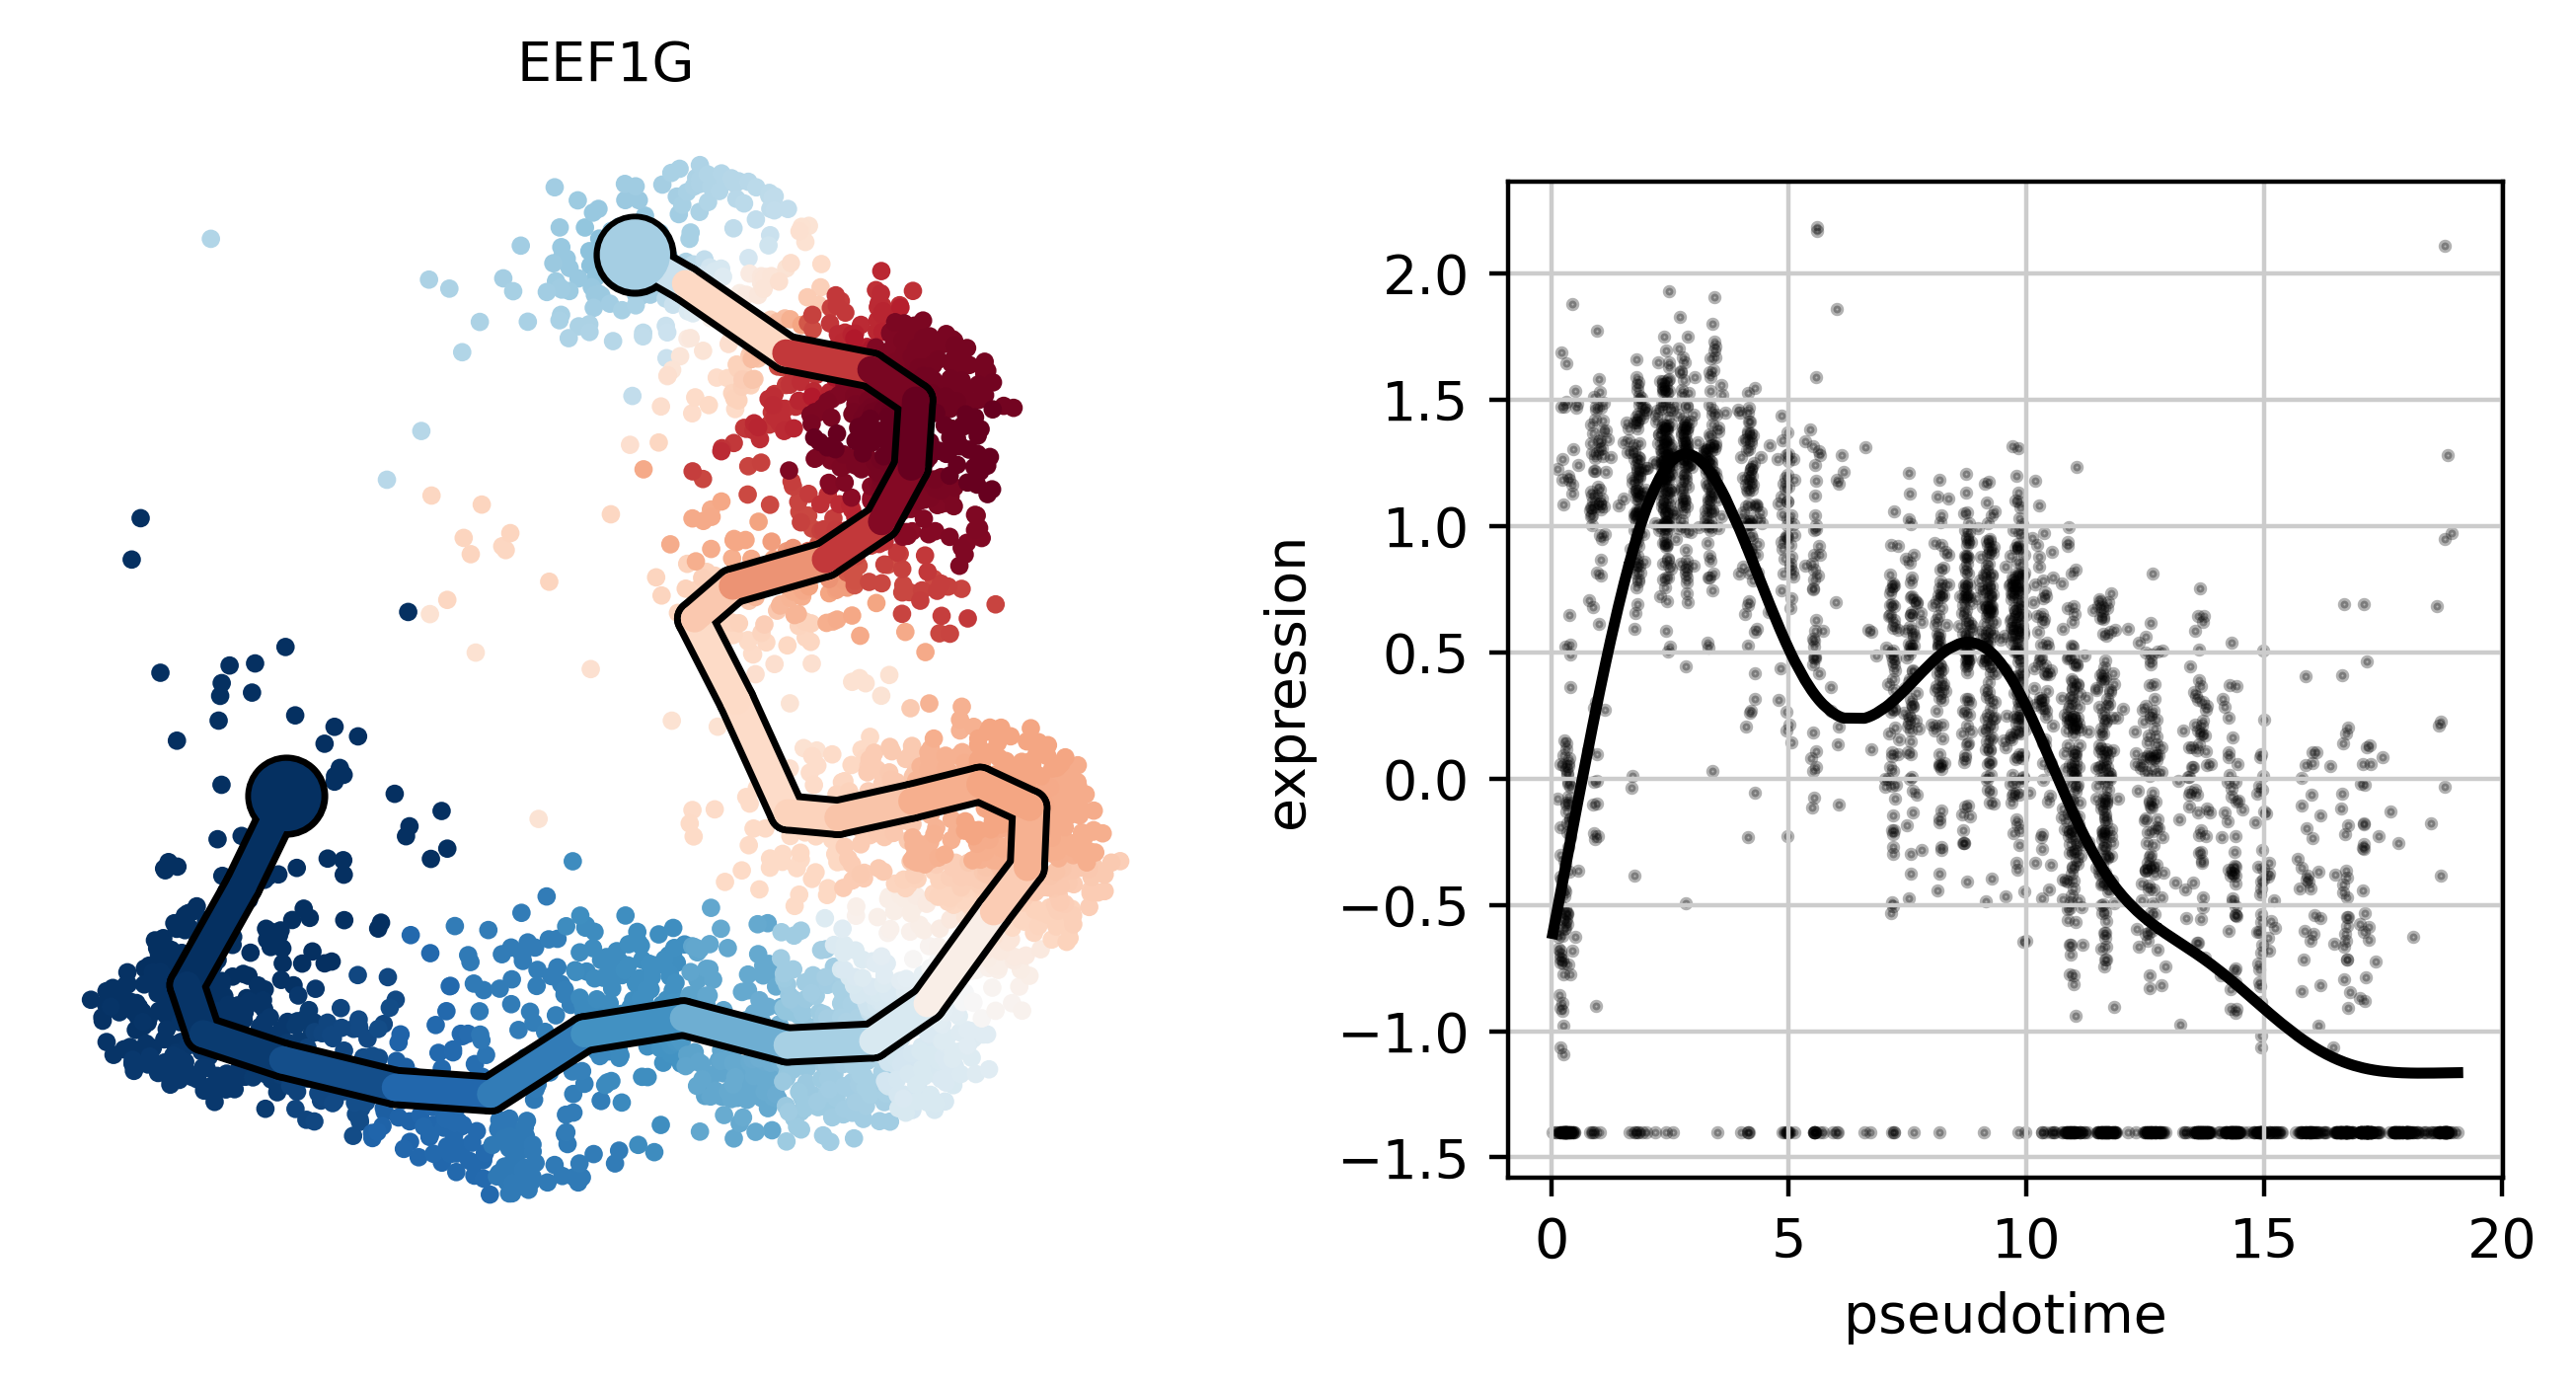

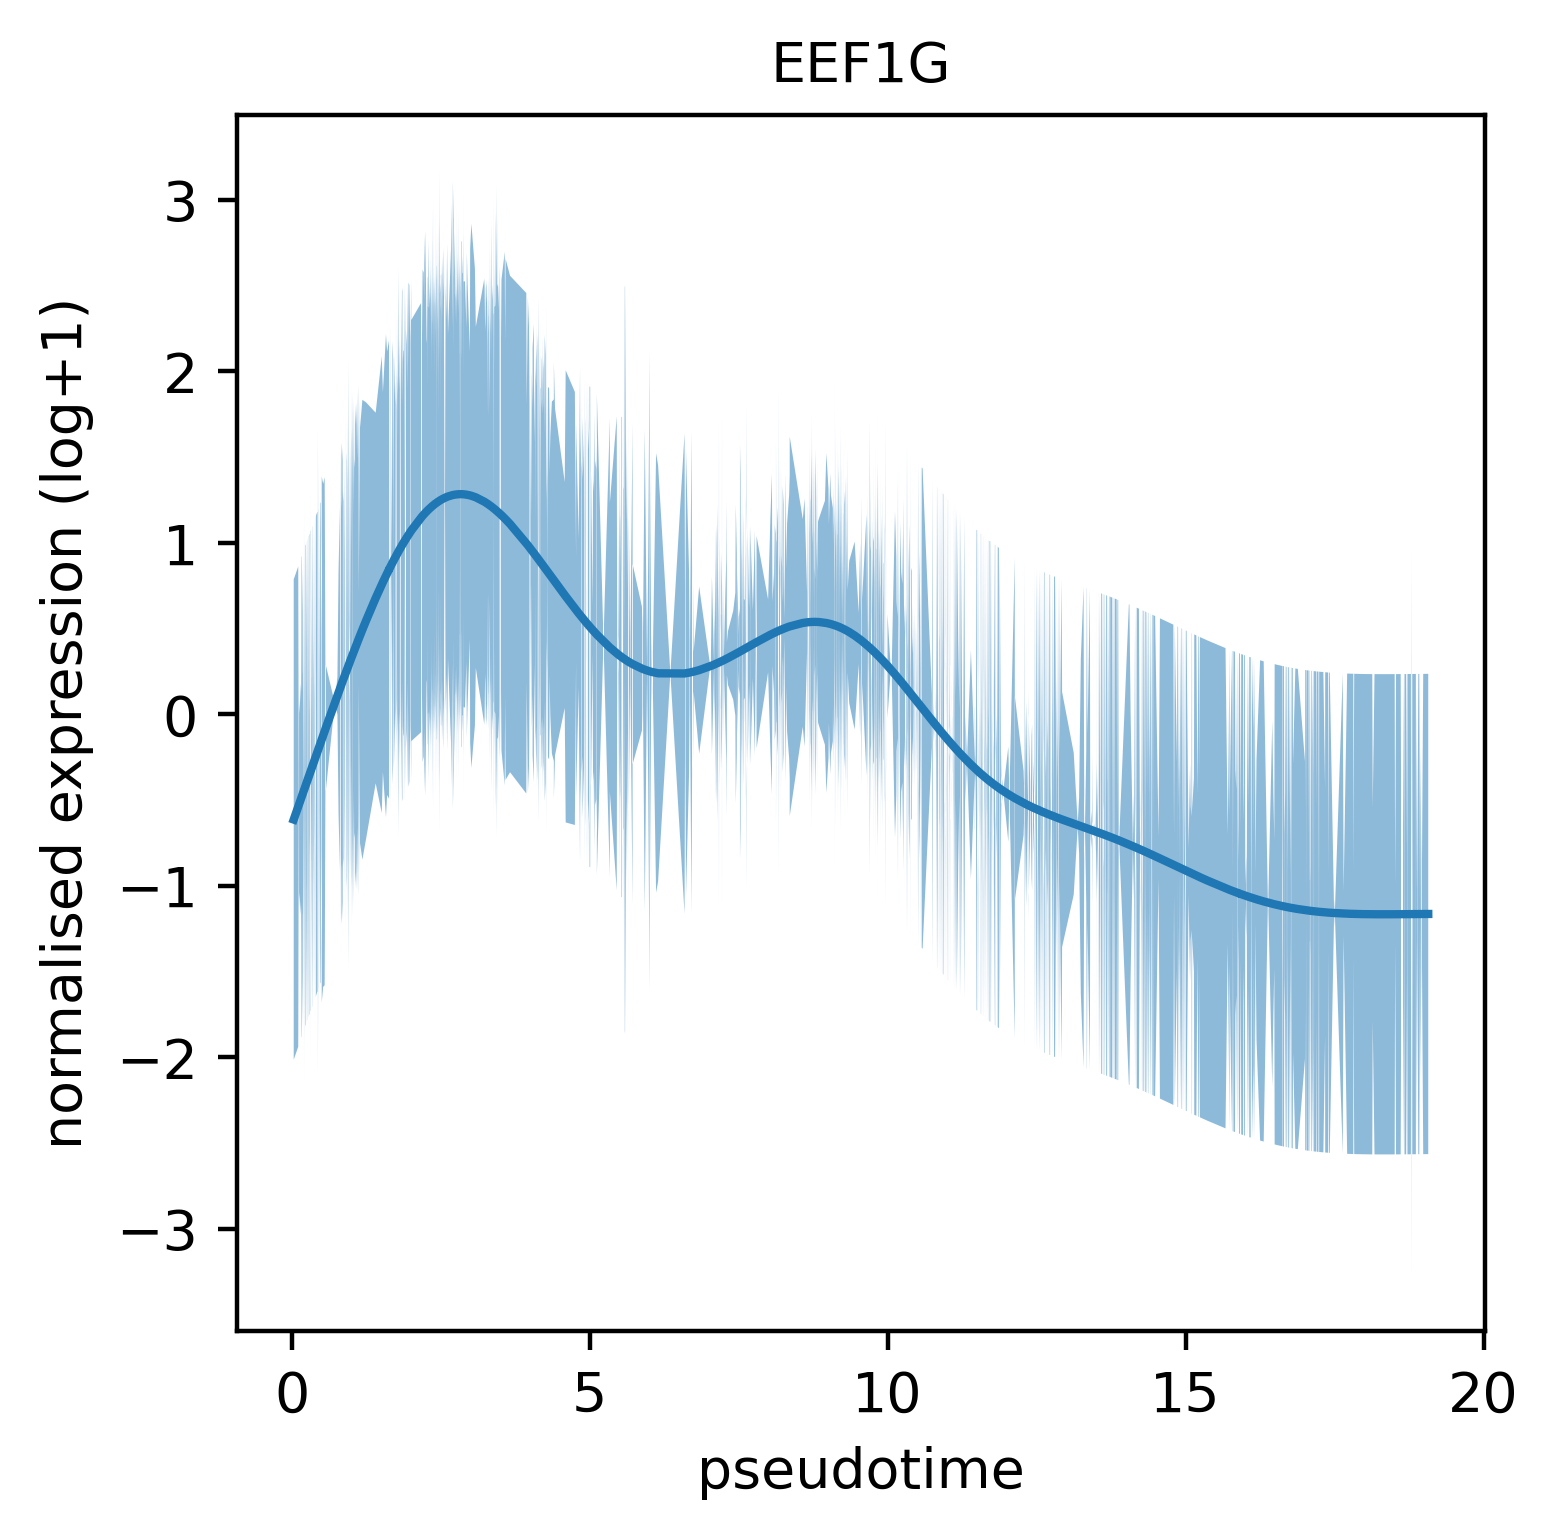

In [33]:
for gene in ['TPPP3', 'CD36', 'EEF1G']:
    scf.pl.single_trend(adata, gene, save=f'_{gene}.pdf',color_exp='k')

    x = pd.DataFrame({'pseudotime': adata.obs['t'].sort_values(),
                  'expression': adata[adata.obs['t'].sort_values().index,gene].X[:,0],
                  'fitted': adata[adata.obs['t'].sort_values().index,gene].layers['fitted'][:,0]})

    err=(x['expression']-x['expression'].mean())/x['expression'].std()

    plt.plot(x['pseudotime'], x['fitted'])
    plt.fill_between(x['pseudotime'], x['fitted'] - err, x['fitted'] + err, alpha=0.5)
    plt.title(gene)
    plt.xlabel('pseudotime')
    plt.ylabel('normalised expression (log+1)')
    plt.grid(False)


    figure = plt.gcf() # get current figure
    figure.set_size_inches(4, 4)
    # when saving, specify the DPI
    plt.savefig(f"figures/denoised_{gene}.pdf", dpi = 300)